In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.chdir('/home/tapas/')
df = pd.read_csv('cs-training.csv').drop('Unnamed: 0', axis = 1)

<Container object of 11 artists>

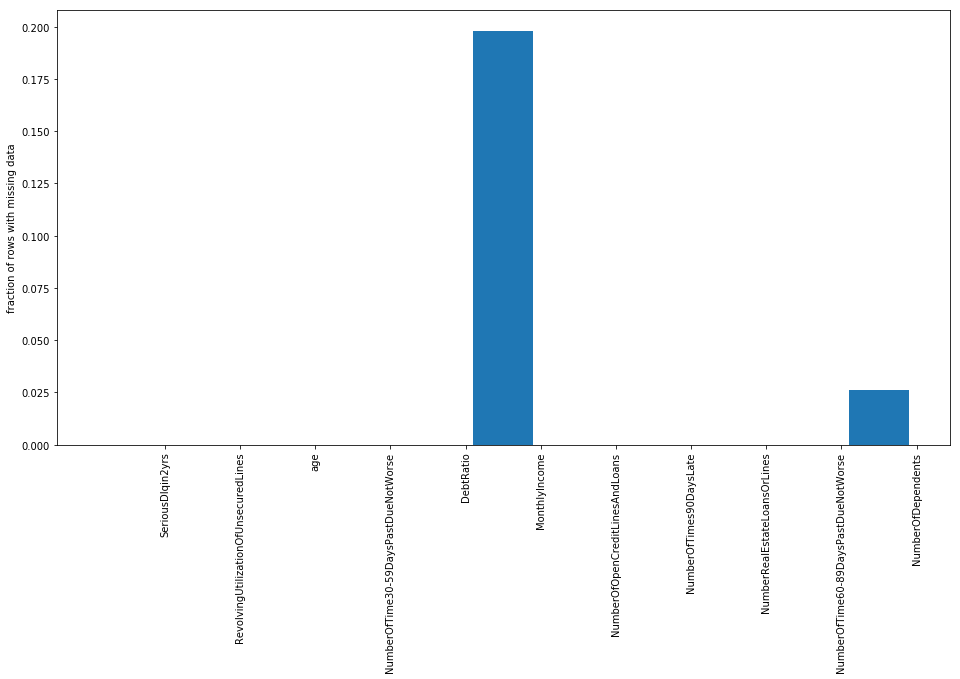

In [3]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [7]:
# To check how many columns have missing values - this can be repeated to see the progress made
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

In [8]:
df[show_missing()].isnull().sum()

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

In [9]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MonthlyIncome,29731,0.198207
NumberOfDependents,3924,0.026160
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberOfOpenCreditLinesAndLoans,0,0.000000
DebtRatio,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
age,0,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000


In [ ]:
# MonthlyIncome

# only in df, fill the two missing values with the most occurred value, which is "S".
df["Embarked"] = df["MonthlyIncome"].fillna("S")
# plot
sns.factorplot('MonthlyIncome','SeriousDlqin2yrs', data=df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='MonthlyIncome', data=df, ax=axis1)
sns.countplot(x='SeriousDlqin2yrs', hue="MonthlyIncome", data=df, order=[1,0], ax=axis2)

MonthlyIncome_perc = titanic_df[["MonthlyIncome", "SeriousDlqin2yrs"]].groupby(['MonthlyIncome'],as_index=False).mean()
sns.barplot(x='MonthlyIncome', y='SeriousDlqin2yrs', data=MonthlyIncome_perc,order=['S','C','Q'],ax=axis3)